In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load in differential gene expression analysis comparing ATB vs. LTBI subjects

In [3]:
diff_exp_df = pd.read_csv('/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/Microarray Differential Gene Expression/ATB_v_LTBI/GSE19439.csv')

In [4]:
diff_exp_df.head()

,Unnamed: 0,ID,Gene.title,Gene.symbol,Gene.ID,UniGene.title,UniGene.symbol,UniGene.ID,Nucleotide.Title,GI,...,GO.Function.ID,GO.Process.ID,GO.Component.ID,Platform_SEQUENCE,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ILMN_1343291,ILMN_1343291,eukaryotic translation elongation factor 1 alp...,EEF1A1,1915,NaN,NaN,NaN,Homo sapiens eukaryotic translation elongation...,83367078,...,GO:0005525///GO:0003924///GO:0044822///GO:0005...,GO:0071364///GO:1904714///GO:0006355///GO:0006...,GO:0030864///GO:0005737///GO:0005737///GO:0005...,TGTGTTGAGAGCTTCTCAGACTATCCACCTTTGGGTCGCTTTGCTG...,-0.385736,14.440305,-3.638749,0.001026,0.018350,-0.928416
1,ILMN_1651209,ILMN_1651209,solute carrier family 35 member E2,SLC35E2,9906,NaN,NaN,NaN,Homo sapiens solute carrier family 35 member E...,315139027,...,NaN,NaN,GO:0016021,TCACGGCGTACGCCCTCATGGGGAAAATCTCCCCGGTGACTTTCAG...,0.600534,2.642316,1.154641,0.258423,0.552408,-5.706855
2,ILMN_1651228,ILMN_1651228,ribosomal protein S28,RPS28,6234,NaN,NaN,NaN,"Homo sapiens ribosomal protein S28 (RPS28), mRNA",71565158,...,GO:0044822///GO:0005515///GO:0003735,GO:0006614///GO:0000184///GO:0006407///GO:0006...,GO:0005737///GO:0005829///GO:0022627///GO:0070...,CGCCACACGTAACTGAGATGCTCCTTTAAATAAAGCGTTTGTGTTT...,-0.713932,10.307266,-3.736265,0.000789,0.015405,-0.682912
3,ILMN_1651229,ILMN_1651229,importin 13,IPO13,9670,NaN,NaN,NaN,"Homo sapiens importin 13 (IPO13), mRNA",224831256,...,GO:0008536///GO:0008139///GO:0005515///GO:0008565,GO:0006606,GO:0005737///GO:0031965,ACAAGAGGCGGGTGAAGGAGATGGTGAAGGAGTTCACACTGCTGTG...,-0.384153,3.487297,-1.801078,0.081813,0.295311,-4.863138
4,ILMN_1651232,ILMN_1651232,"family with sequence similarity 86, member A p...",FAM86FP,653113,NaN,NaN,NaN,Homo sapiens family with sequence similarity 8...,209954785,...,NaN,NaN,NaN,GGGAGGCTCGGTCACAATCTCCGAGAGCACAGCCATCATCTCTCAC...,-0.314635,2.664980,-1.054969,0.300204,0.593780,-5.838580


In [5]:
np.shape(diff_exp_df)

(19599, 29)

#### Construct volcano plot using Benjamini & Hochberg method to adjust p-values (controls False discovery rate)

In [6]:
alpha = 0.05

There are 155 significant differentially expressed genes between these two samples at a signficance threshold of 0.05


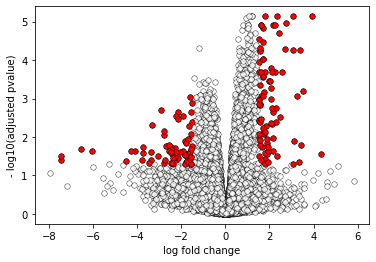

In [7]:
p_val_series = -1 * np.log10(diff_exp_df.loc[: , 'adj.P.Val'])
log_FC_series = diff_exp_df.loc[: , 'logFC']

fig , ax = plt.subplots()
plt.scatter(log_FC_series , p_val_series , color = 'white' , linewidth = .5 , edgecolor = 'black' , s = 30 , alpha = 0.8)

sig_diff_genes_filter = [(abs(logFC_i) > 1.5) and (pval_i > -1*np.log10(alpha)) for logFC_i , pval_i in zip(log_FC_series, p_val_series)]
print('There are {0} significant differentially expressed genes between these two samples at a signficance threshold of {1}'.format(np.sum(sig_diff_genes_filter) , alpha))
plt.scatter(log_FC_series[sig_diff_genes_filter] , p_val_series[sig_diff_genes_filter] , color = 'red' , linewidth = .5 , edgecolor = 'black' , s = 30)

plt.xlabel('log fold change')
plt.ylabel('- log10(adjusted pvalue)')

plt.show()

Sorted by smallest p-value

In [8]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'adj.P.Val').head(n = 10)

,Gene.symbol,logFC,adj.P.Val
13632,ANKRD22,3.928364,0.000007
13551,SRBD1,1.054350,0.000007
13432,DUSP3,1.190391,0.000007
3759,BATF2,3.047247,0.000007
5312,SORT1,1.175896,0.000007
17109,GBP5,2.361777,0.000007
3102,JAK2,1.206767,0.000007
14511,VAMP5,1.774608,0.000007
5437,IRF1,0.915508,0.000008
18401,FCGR1B,2.745593,0.000011


Expression of *GBP5* & *DUSP3* upregulated in LTBI relative to ATB subjects?

In [9]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'GBP5']

,Gene.symbol,logFC,adj.P.Val
17109,GBP5,2.361777,0.000007


In [10]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'DUSP3']

,Gene.symbol,logFC,adj.P.Val
13432,DUSP3,1.190391,0.000007


Expression of *KLF2* downregulated in LTBI relative to ATB subjects?

In [11]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'KLF2']

,Gene.symbol,logFC,adj.P.Val
7926,KLF2,-0.363101,0.009354


Sorted by smallest log-FC

In [12]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'logFC').head(n = 10)

,Gene.symbol,logFC,adj.P.Val
7272,C14orf177,-7.967651,0.086442
3250,IFNA6,-7.454185,0.040066
11367,SOX11,-7.447031,0.030567
15886,LINC00297,-7.193028,0.188204
10960,ERC2,-6.548039,0.020322
13059,CIART,-6.037794,0.022801
17337,PPY2P,-6.029758,0.061798
12251,B3GNT9,-5.554505,0.116325
4028,FAM92B,-5.524731,0.283411
8453,CH25H,-5.362078,0.183716


Sorted by largest log-FC

In [13]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'logFC' , ascending = False).head(n = 10)

,Gene.symbol,logFC,adj.P.Val
9433,MS4A5,5.841651,0.140920
3842,VTN,5.096586,0.057398
1882,GABRG1,4.941027,0.164199
14224,C17orf78,4.744922,0.076674
15868,LINC00371,4.599720,0.184180
4766,VEGFC,4.596993,0.145378
14426,TPSD1,4.558293,0.418700
10017,DAB1,4.384373,0.435003
17741,ARHGEF38,4.332725,0.027556
18061,OR6C70,4.192955,0.085897
